In [47]:
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.covariance import empirical_covariance
from sklearn.preprocessing import Normalizer
from matplotlib.pyplot import plot,scatter,show,ylabel,xlabel
import numpy as np
import os
dataPath = os.path.join(os.getenv("HOME"), 
                        'Project/WomenIndustrySurveyHolzblatt/Data/DataForClustering/slidersByItem.csv')

data = pandas.read_csv(dataPath)

In [25]:
pca = PCA(n_components=3, whiten=True)
pca.fit(data, copy=True)
print(pca.explained_variance_ratio_)

[ 0.93636335  0.03481853  0.00741046]


In [26]:
xformedData = pca.transform(data)

In [27]:
xformedData

array([[-1.32091009,  1.12098398, -0.19027295],
       [-1.31655254,  1.36514611,  0.51456993],
       [-1.31452016,  1.30013032, -0.20777293],
       [-1.31280942,  0.58543981,  0.95511219],
       [-1.3086507 ,  1.23802058, -0.30391631],
       [-1.30888933,  0.9008692 ,  0.71150983],
       [-1.2977878 ,  1.53188166, -0.78658937],
       [-1.30593321, -1.24476545,  0.28058602],
       [-1.28455943, -1.31430577,  0.95884931],
       [-1.26362794,  0.76265448,  1.18303786],
       [-1.25094145, -0.3210522 ,  1.94455832],
       [-1.23882421,  1.70494389, -0.99821492],
       [-1.22571094,  1.10364772, -0.79950109],
       [-1.21400087, -0.43968173, -0.90148823],
       [-1.21156841, -1.01945674, -0.70776963],
       [-1.17370466,  1.04570227,  0.21514047],
       [-1.1791025 , -1.29463903,  0.6764087 ],
       [-1.15308805,  1.50743158,  0.30087619],
       [-1.15395217, -1.1014095 , -0.4480489 ],
       [-1.14490845,  1.41935106, -0.48626549],
       [-1.13616136, -1.16544591,  0.014

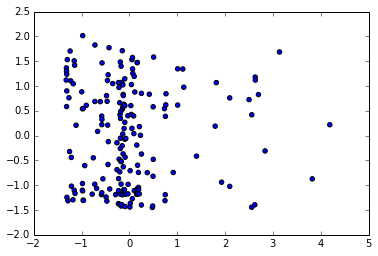

In [28]:
scatter(xformedData[:,0], xformedData[:,1])

In [31]:
# Get K-Means on the reduced-dimension set:
(centroids, distortion) = kmeans(xformedData, 3)

In [32]:
centroids

array([[-0.02702366,  1.09468477, -0.15168565],
       [-0.09103949, -0.91816029, -0.76710746],
       [ 0.14651215, -0.19916851,  1.14129546]])

In [34]:
(clusterIndexes, distortions) = vq(xformedData, centroids)

In [35]:
clusterIndexes

array([0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 2,
       1, 2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 2,
       0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 0,
       2, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 2,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2], dtype=int32)

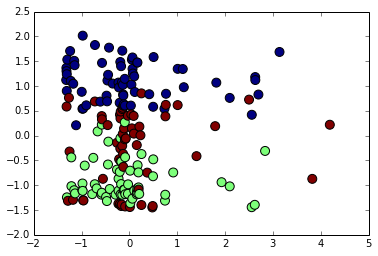

In [38]:
# Plot question clusters based on first two
# principle components:
scatter(xformedData[:,0], xformedData[:,1], s=80, c=clusterIndexes)

In [39]:
covarMatrixXformed = empirical_covariance(xformedData)

In [40]:
# Check that only miniscule covariance
covarMatrixXformed

array([[  1.00000000e+00,   1.05615999e-14,   2.89623398e-17],
       [  1.05615999e-14,   1.00000000e+00,   1.86565739e-14],
       [  2.89623398e-17,   1.86565739e-14,   1.00000000e+00]])

In [48]:
normalizer = Normalizer()
normedData = normalizer.fit_transform(data)
covarMatrixOrig = empirical_covariance(normedData, assume_centered=False)

In [49]:
covarMatrixOrig

array([[  6.74063170e-16,  -5.98635726e-13,  -6.15974928e-13, ...,
         -6.22658097e-13,  -5.92721294e-13,  -5.28146758e-13],
       [ -5.98635726e-13,   9.68461229e-10,   6.42599288e-10, ...,
          7.06960757e-10,   6.92831535e-10,   4.95140698e-10],
       [ -6.15974928e-13,   6.42599288e-10,   7.74998397e-10, ...,
          6.73825030e-10,   6.18591096e-10,   4.93189825e-10],
       ..., 
       [ -6.22658097e-13,   7.06960757e-10,   6.73825030e-10, ...,
          1.04381513e-09,   8.57357670e-10,   6.37922484e-10],
       [ -5.92721294e-13,   6.92831535e-10,   6.18591096e-10, ...,
          8.57357670e-10,   1.03686714e-09,   6.50488124e-10],
       [ -5.28146758e-13,   4.95140698e-10,   4.93189825e-10, ...,
          6.37922484e-10,   6.50488124e-10,   6.86062364e-10]])

In [50]:
normedData

array([[  9.99999939e-01,   5.56320789e-05,   6.42511334e-05, ...,
          4.62294740e-05,   6.42511334e-05,   6.89524359e-05],
       [  9.99999931e-01,   6.89522732e-05,   6.42509819e-05, ...,
          7.36535646e-05,   6.89522732e-05,   6.42509819e-05],
       [  9.99999930e-01,   5.09305765e-05,   5.56318605e-05, ...,
          7.36534491e-05,   5.95495971e-05,   5.95495971e-05],
       ..., 
       [  9.99999887e-01,   7.81271275e-05,   7.81271275e-05, ...,
          7.34394998e-05,   7.81271275e-05,   7.81271275e-05],
       [  9.99999989e-01,   2.73321335e-05,   1.40565258e-05, ...,
          2.73321335e-05,   1.87420344e-05,   0.00000000e+00],
       [  9.99999958e-01,   6.87045340e-05,   4.13788671e-05, ...,
          6.87045340e-05,   7.80733341e-05,   0.00000000e+00]])